In [1]:
import warnings
warnings.filterwarnings('ignore')

import os

import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_train = pd.read_csv('C:/Users/MG/Desktop/OSIC_pre/train.csv')
df_test = pd.read_csv('C:/Users/MG/Desktop/OSIC_pre/test.csv')
print(f'Training Set Shape = {df_train.shape} - Patients = {df_train["Patient"].nunique()}')
print(f'Training Set Memory Usage = {df_train.memory_usage().sum() / 1024 ** 2:.2f} MB')
print(f'Test Set Shape = {df_test.shape} - Patients = {df_test["Patient"].nunique()}')
print(f'Test Set Memory Usage = {df_test.memory_usage().sum() / 1024 ** 2:.2f} MB')


Training Set Shape = (1549, 7) - Patients = 176
Training Set Memory Usage = 0.08 MB
Test Set Shape = (5, 7) - Patients = 5
Test Set Memory Usage = 0.00 MB


In [3]:
training_sample_counts = df_train.rename(columns={'Weeks': 'Samples'}).groupby('Patient').agg('count')['Samples'].value_counts()
print(f'Training Set FVC Measurements Per Patient \n{("-") * 41}\n{training_sample_counts}')


Training Set FVC Measurements Per Patient 
-----------------------------------------
9     132
8      25
10     10
7       7
6       2
Name: Samples, dtype: int64


FVC Statistical Summary
-----------------------
Mean: 2690.48  -  Median: 2641.0  -  Std: 832.771
Min: 827  -  25%: 2109.0  -  50%: 2641.0  -  75%: 3171.0  -  Max: 6399
Skew: 0.584271  -  Kurtosis: 0.571985
Missing Values: 0/1549 (0.0%)


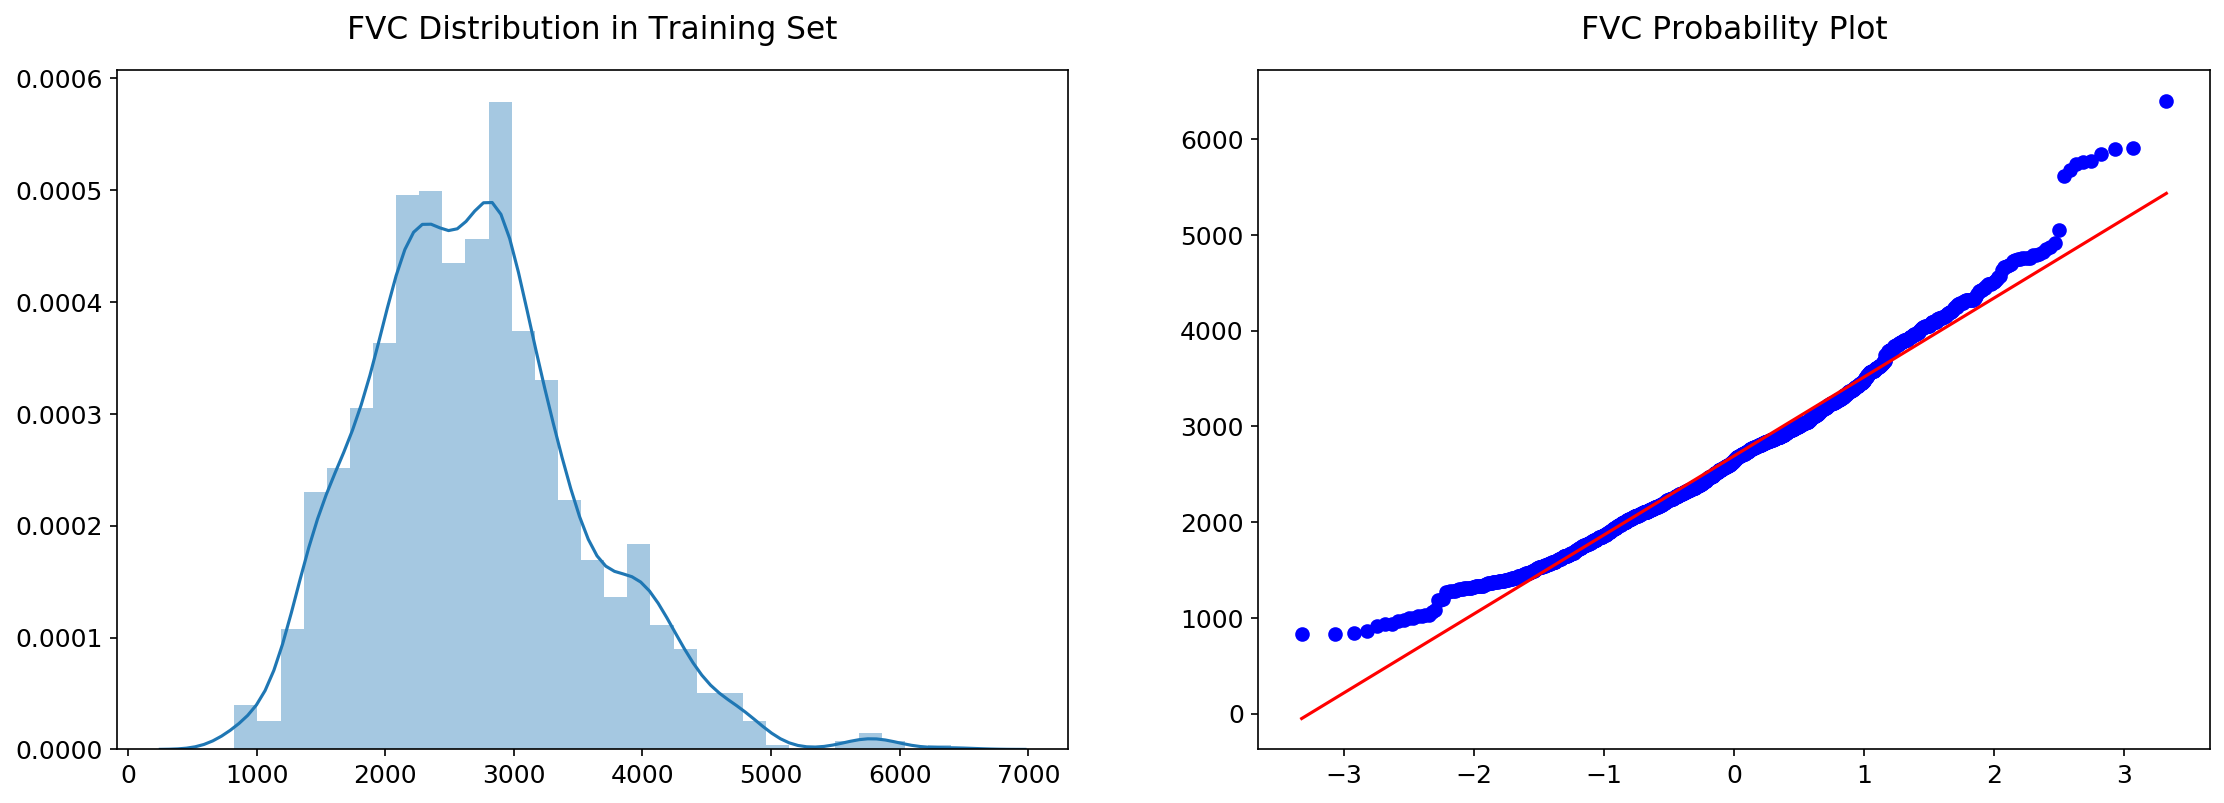

In [4]:
print(f'FVC Statistical Summary\n{"-" * 23}')

print(f'Mean: {df_train["FVC"].mean():.6}  -  Median: {df_train["FVC"].median():.6}  -  Std: {df_train["FVC"].std():.6}')
print(f'Min: {df_train["FVC"].min()}  -  25%: {df_train["FVC"].quantile(0.25)}  -  50%: {df_train["FVC"].quantile(0.5)}  -  75%: {df_train["FVC"].quantile(0.75)}  -  Max: {df_train["FVC"].max()}')
print(f'Skew: {df_train["FVC"].skew():.6}  -  Kurtosis: {df_train["FVC"].kurtosis():.6}')
missing_values_count = df_train[df_train["FVC"].isnull()].shape[0]
training_samples_count = df_train.shape[0]
print(f'Missing Values: {missing_values_count}/{training_samples_count} ({missing_values_count * 100 / training_samples_count:.4}%)')

fig, axes = plt.subplots(ncols=2, figsize=(18, 6), dpi=150)

sns.distplot(df_train['FVC'], label='FVC', ax=axes[0])
stats.probplot(df_train['FVC'], plot=axes[1])

for i in range(2):
    axes[i].tick_params(axis='x', labelsize=12)
    axes[i].tick_params(axis='y', labelsize=12)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    
axes[0].set_title(f'FVC Distribution in Training Set', size=15, pad=15)
axes[1].set_title(f'FVC Probability Plot', size=15, pad=15)

plt.show()

Patient: ID00007637202177411956430 FVC Statistical Summary
----------------------------------------------------------
Mean: 2113.89  -  Median: 2069.0  -  Std: 96.8561
Min: 2000 -  Max: 2315
Skew: 1.26267  -  Kurtosis: 1.31481
Change Mean: 77.0  - Change Median: 79.0  - Change Std: 44.8203
Change Min: 7.0 -  Change Max: 153.0
Change Skew: 0.0645445 -  Change Kurtosis: 0.38165


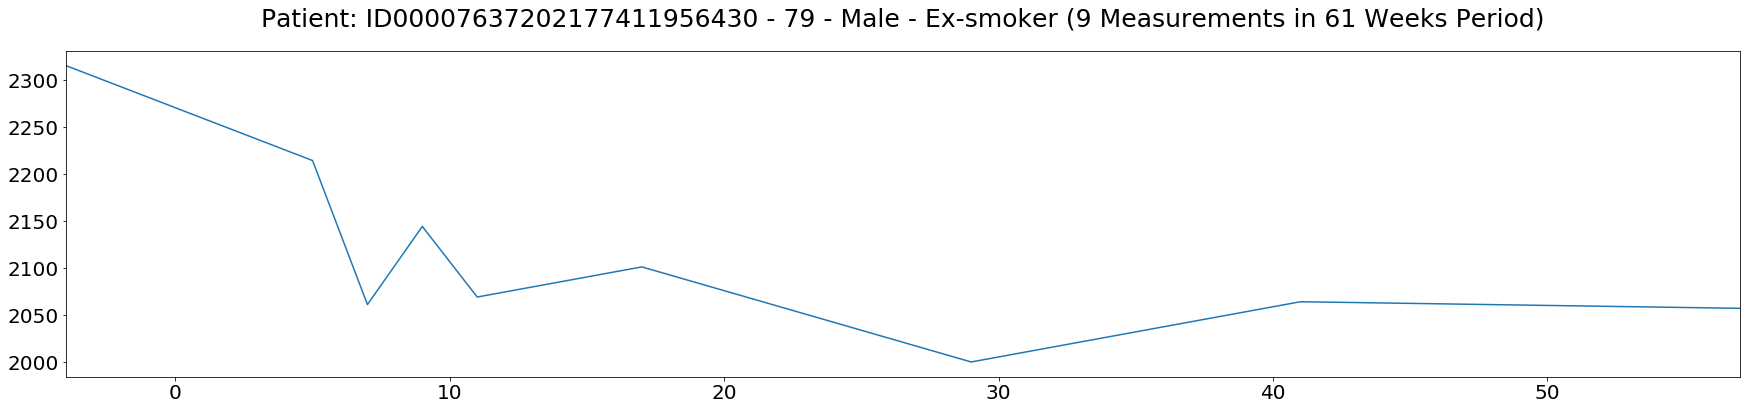

Patient: ID00009637202177434476278 FVC Statistical Summary
----------------------------------------------------------
Mean: 3680.86  -  Median: 3639.0  -  Std: 110.205
Min: 3578 -  Max: 3895
Skew: 1.49863  -  Kurtosis: 1.84591
Change Mean: 116.5  - Change Median: 90.5  - Change Std: 90.6835
Change Min: 47.0 -  Change Max: 285.0
Change Skew: 1.60545 -  Change Kurtosis: 2.63783


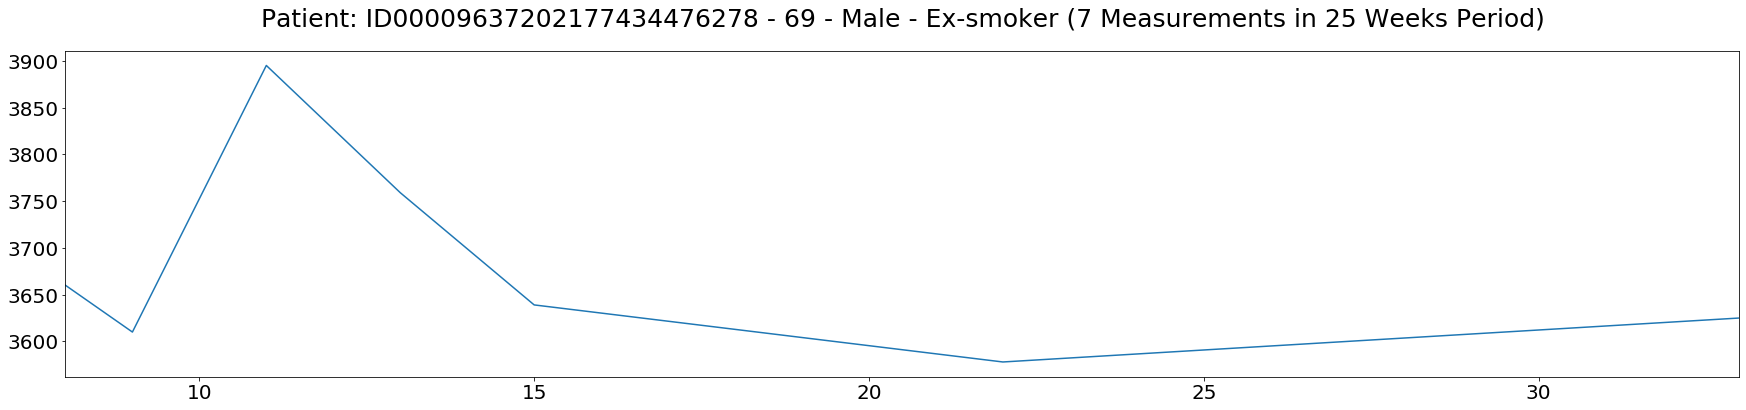

In [5]:
def plot_fvc(df, patient):
        
    df[['Weeks', 'FVC']].set_index('Weeks').plot(figsize=(30, 6), label='_nolegend_')
    
    plt.tick_params(axis='x', labelsize=20)
    plt.tick_params(axis='y', labelsize=20)
    plt.xlabel('')
    plt.ylabel('')
    plt.title(f'Patient: {patient} - {df["Age"].tolist()[0]} - {df["Sex"].tolist()[0]} - {df["SmokingStatus"].tolist()[0]} ({len(df)} Measurements in {(df["Weeks"].max() - df["Weeks"].min())} Weeks Period)', size=25, pad=25)
    plt.legend().set_visible(False)
    plt.show()


for patient, df in list(df_train[0:16].groupby('Patient')):
    
    df['FVC_diff-1'] = np.abs(df['FVC'].diff(-1))
    
    print(f'Patient: {patient} FVC Statistical Summary\n{"-" * 58}')
    print(f'Mean: {df["FVC"].mean():.6}  -  Median: {df["FVC"].median():.6}  -  Std: {df["FVC"].std():.6}')
    print(f'Min: {df["FVC"].min()} -  Max: {df["FVC"].max()}')
    print(f'Skew: {df["FVC"].skew():.6}  -  Kurtosis: {df["FVC"].kurtosis():.6}')
    print(f'Change Mean: {df["FVC_diff-1"].mean():.6}  - Change Median: {df["FVC_diff-1"].median():.6}  - Change Std: {df["FVC_diff-1"].std():.6}')
    print(f'Change Min: {df["FVC_diff-1"].min()} -  Change Max: {df["FVC_diff-1"].max()}')
    print(f'Change Skew: {df["FVC_diff-1"].skew():.6} -  Change Kurtosis: {df["FVC_diff-1"].kurtosis():.6}')
    
    plot_fvc(df, patient)


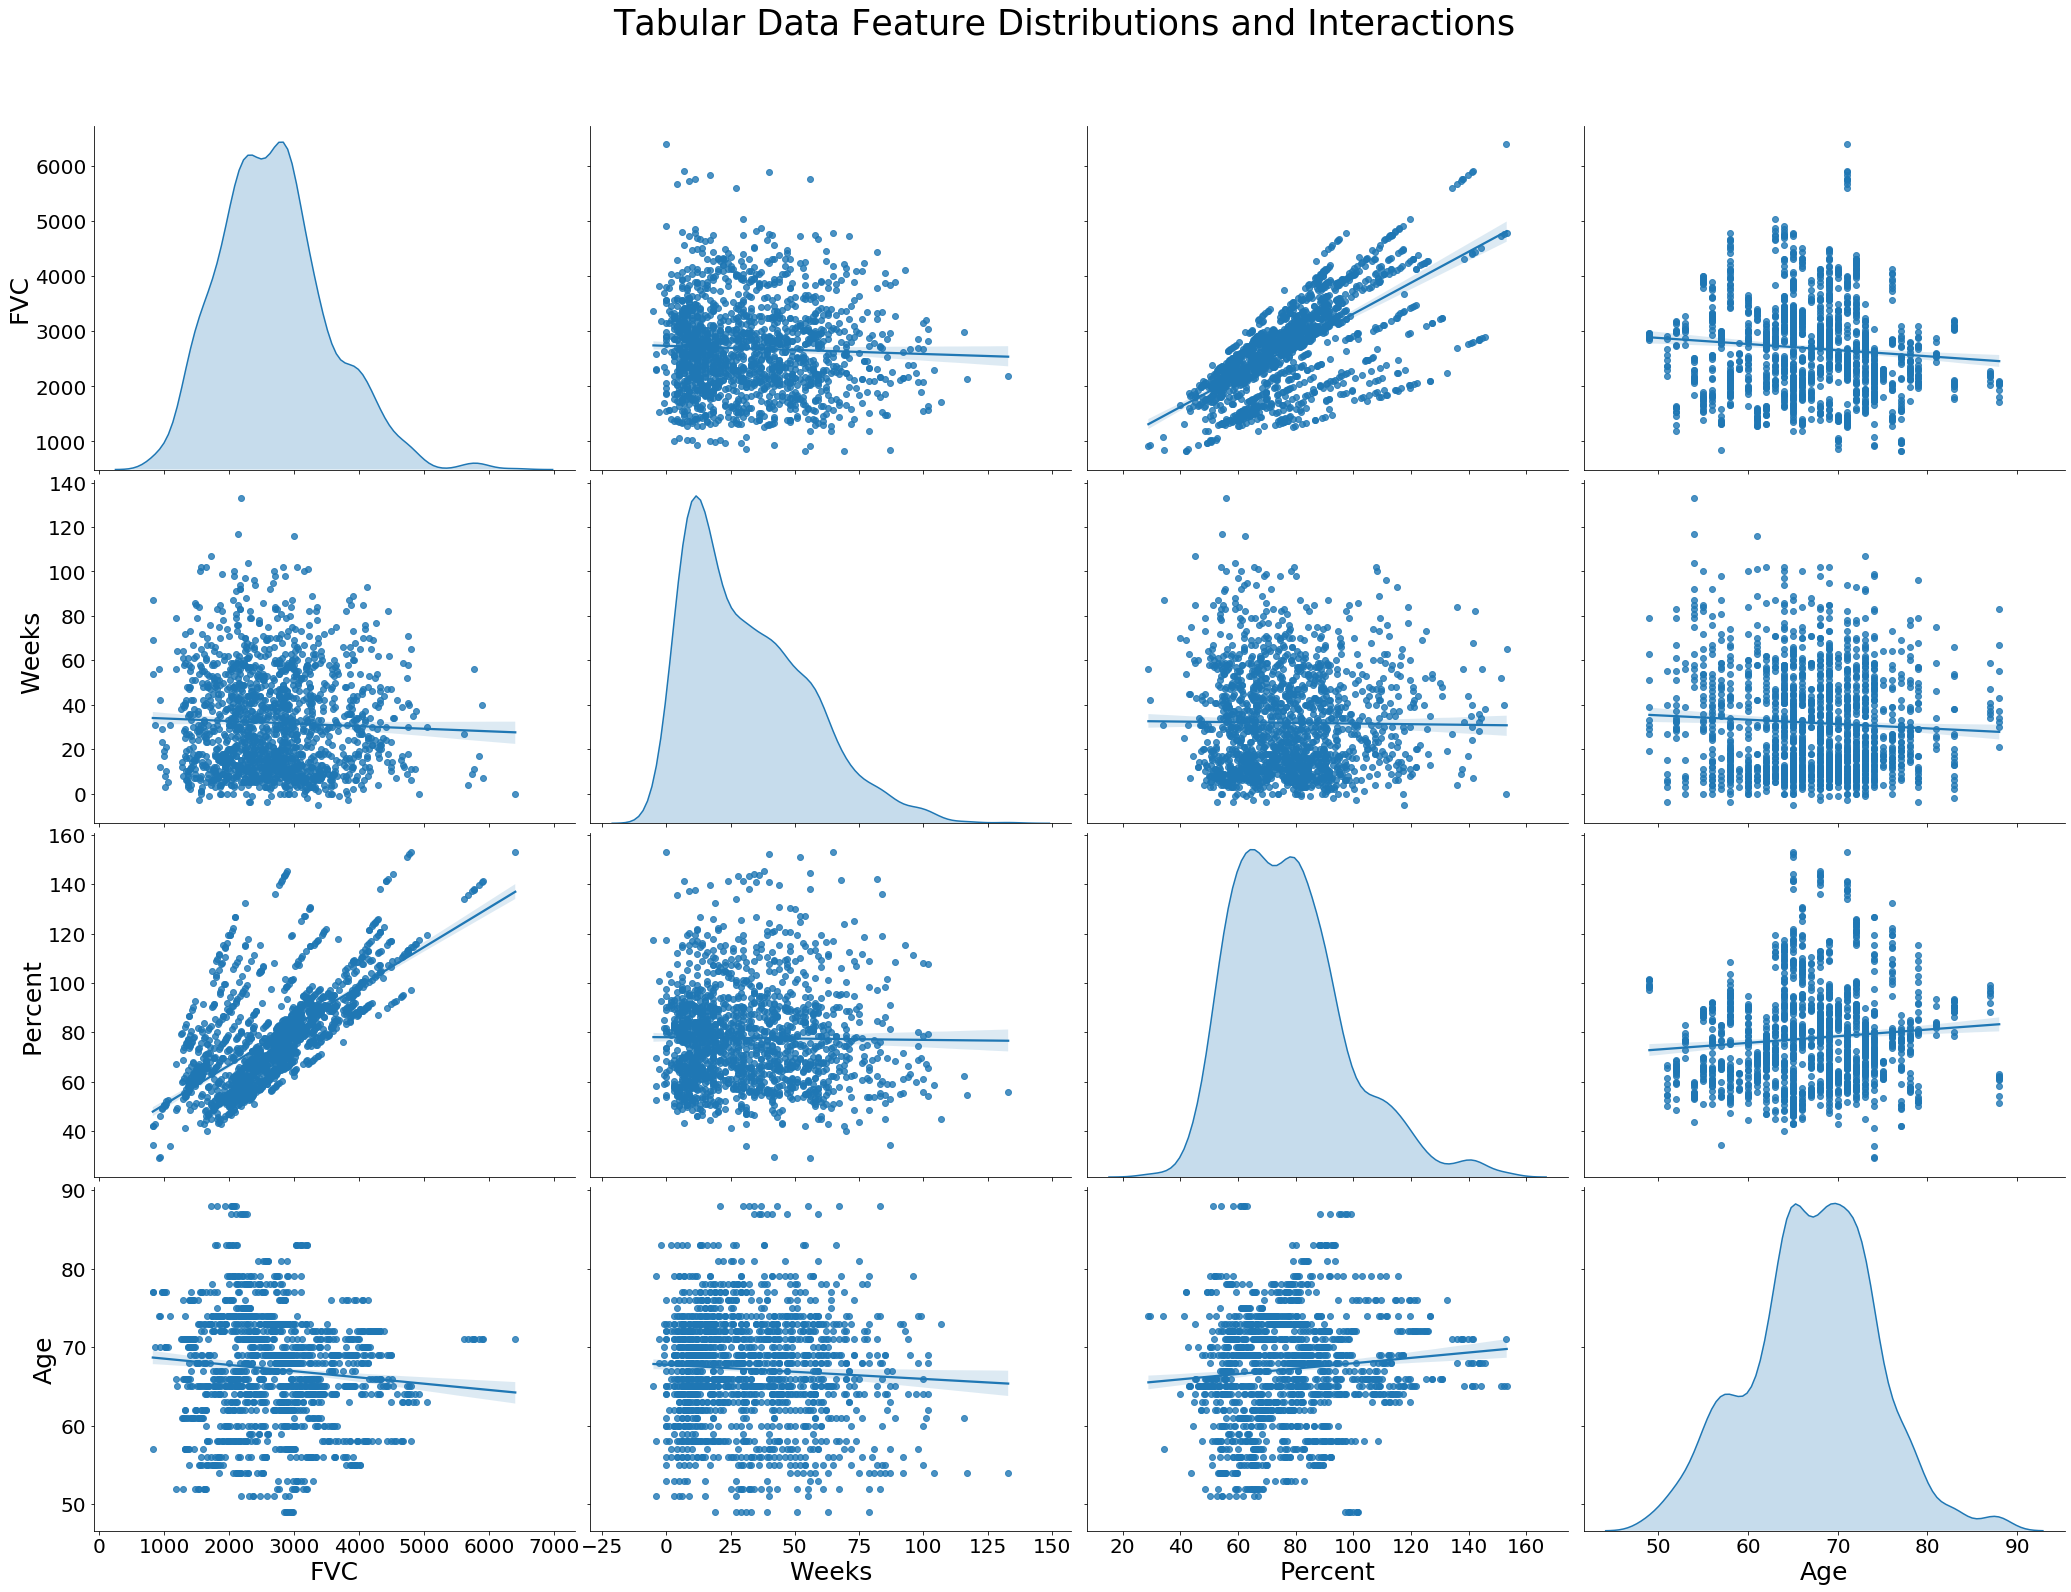

In [6]:
g = sns.pairplot(df_train[['FVC', 'Weeks', 'Percent', 'Age']], aspect=1.4, height=5, diag_kind='kde', kind='reg')

g.axes[3, 0].set_xlabel('FVC', fontsize=25)
g.axes[3, 1].set_xlabel('Weeks', fontsize=25)
g.axes[3, 2].set_xlabel('Percent', fontsize=25)
g.axes[3, 3].set_xlabel('Age', fontsize=25)
g.axes[0, 0].set_ylabel('FVC', fontsize=25)
g.axes[1, 0].set_ylabel('Weeks', fontsize=25)
g.axes[2, 0].set_ylabel('Percent', fontsize=25)
g.axes[3, 0].set_ylabel('Age', fontsize=25)

g.axes[3, 0].tick_params(axis='x', labelsize=20)
g.axes[3, 1].tick_params(axis='x', labelsize=20)
g.axes[3, 2].tick_params(axis='x', labelsize=20)
g.axes[3, 3].tick_params(axis='x', labelsize=20)
g.axes[0, 0].tick_params(axis='y', labelsize=20)
g.axes[1, 0].tick_params(axis='y', labelsize=20)
g.axes[2, 0].tick_params(axis='y', labelsize=20)
g.axes[3, 0].tick_params(axis='y', labelsize=20)

g.fig.suptitle('Tabular Data Feature Distributions and Interactions', fontsize=35, y=1.08)

plt.show()

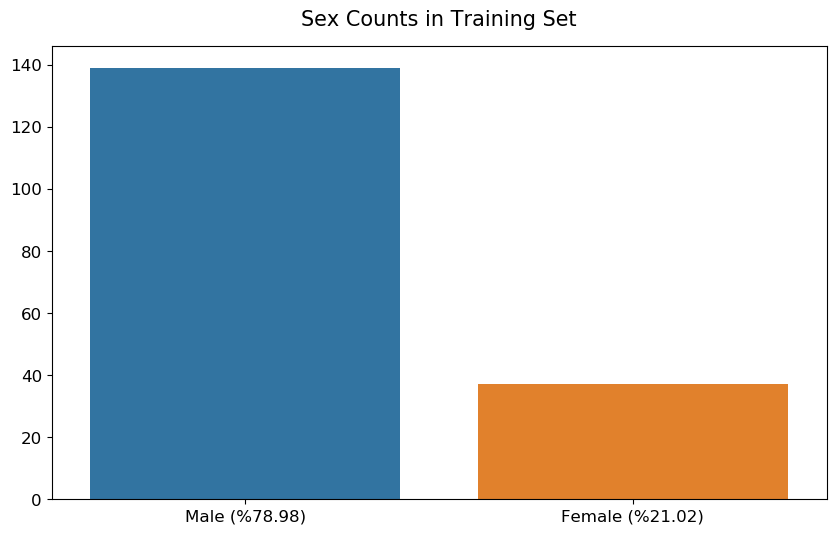

In [7]:
fig = plt.figure(figsize=(10, 6), dpi=100)

sns.barplot(x=df_train.groupby('Patient')['Sex'].first().value_counts().index, y=df_train.groupby('Patient')['Sex'].first().value_counts())
percentages = [(count / df_train.groupby('Patient')['Sex'].first().value_counts().sum() * 100).round(2) for count in df_train.groupby('Patient')['Sex'].first().value_counts()]

plt.ylabel('')
plt.xticks(np.arange(2), [f'Male (%{percentages[0]})', f'Female (%{percentages[1]})'])
plt.tick_params(axis='x', labelsize=12)
plt.tick_params(axis='y', labelsize=12)
plt.title('Sex Counts in Training Set', size=15, pad=15)

plt.show()

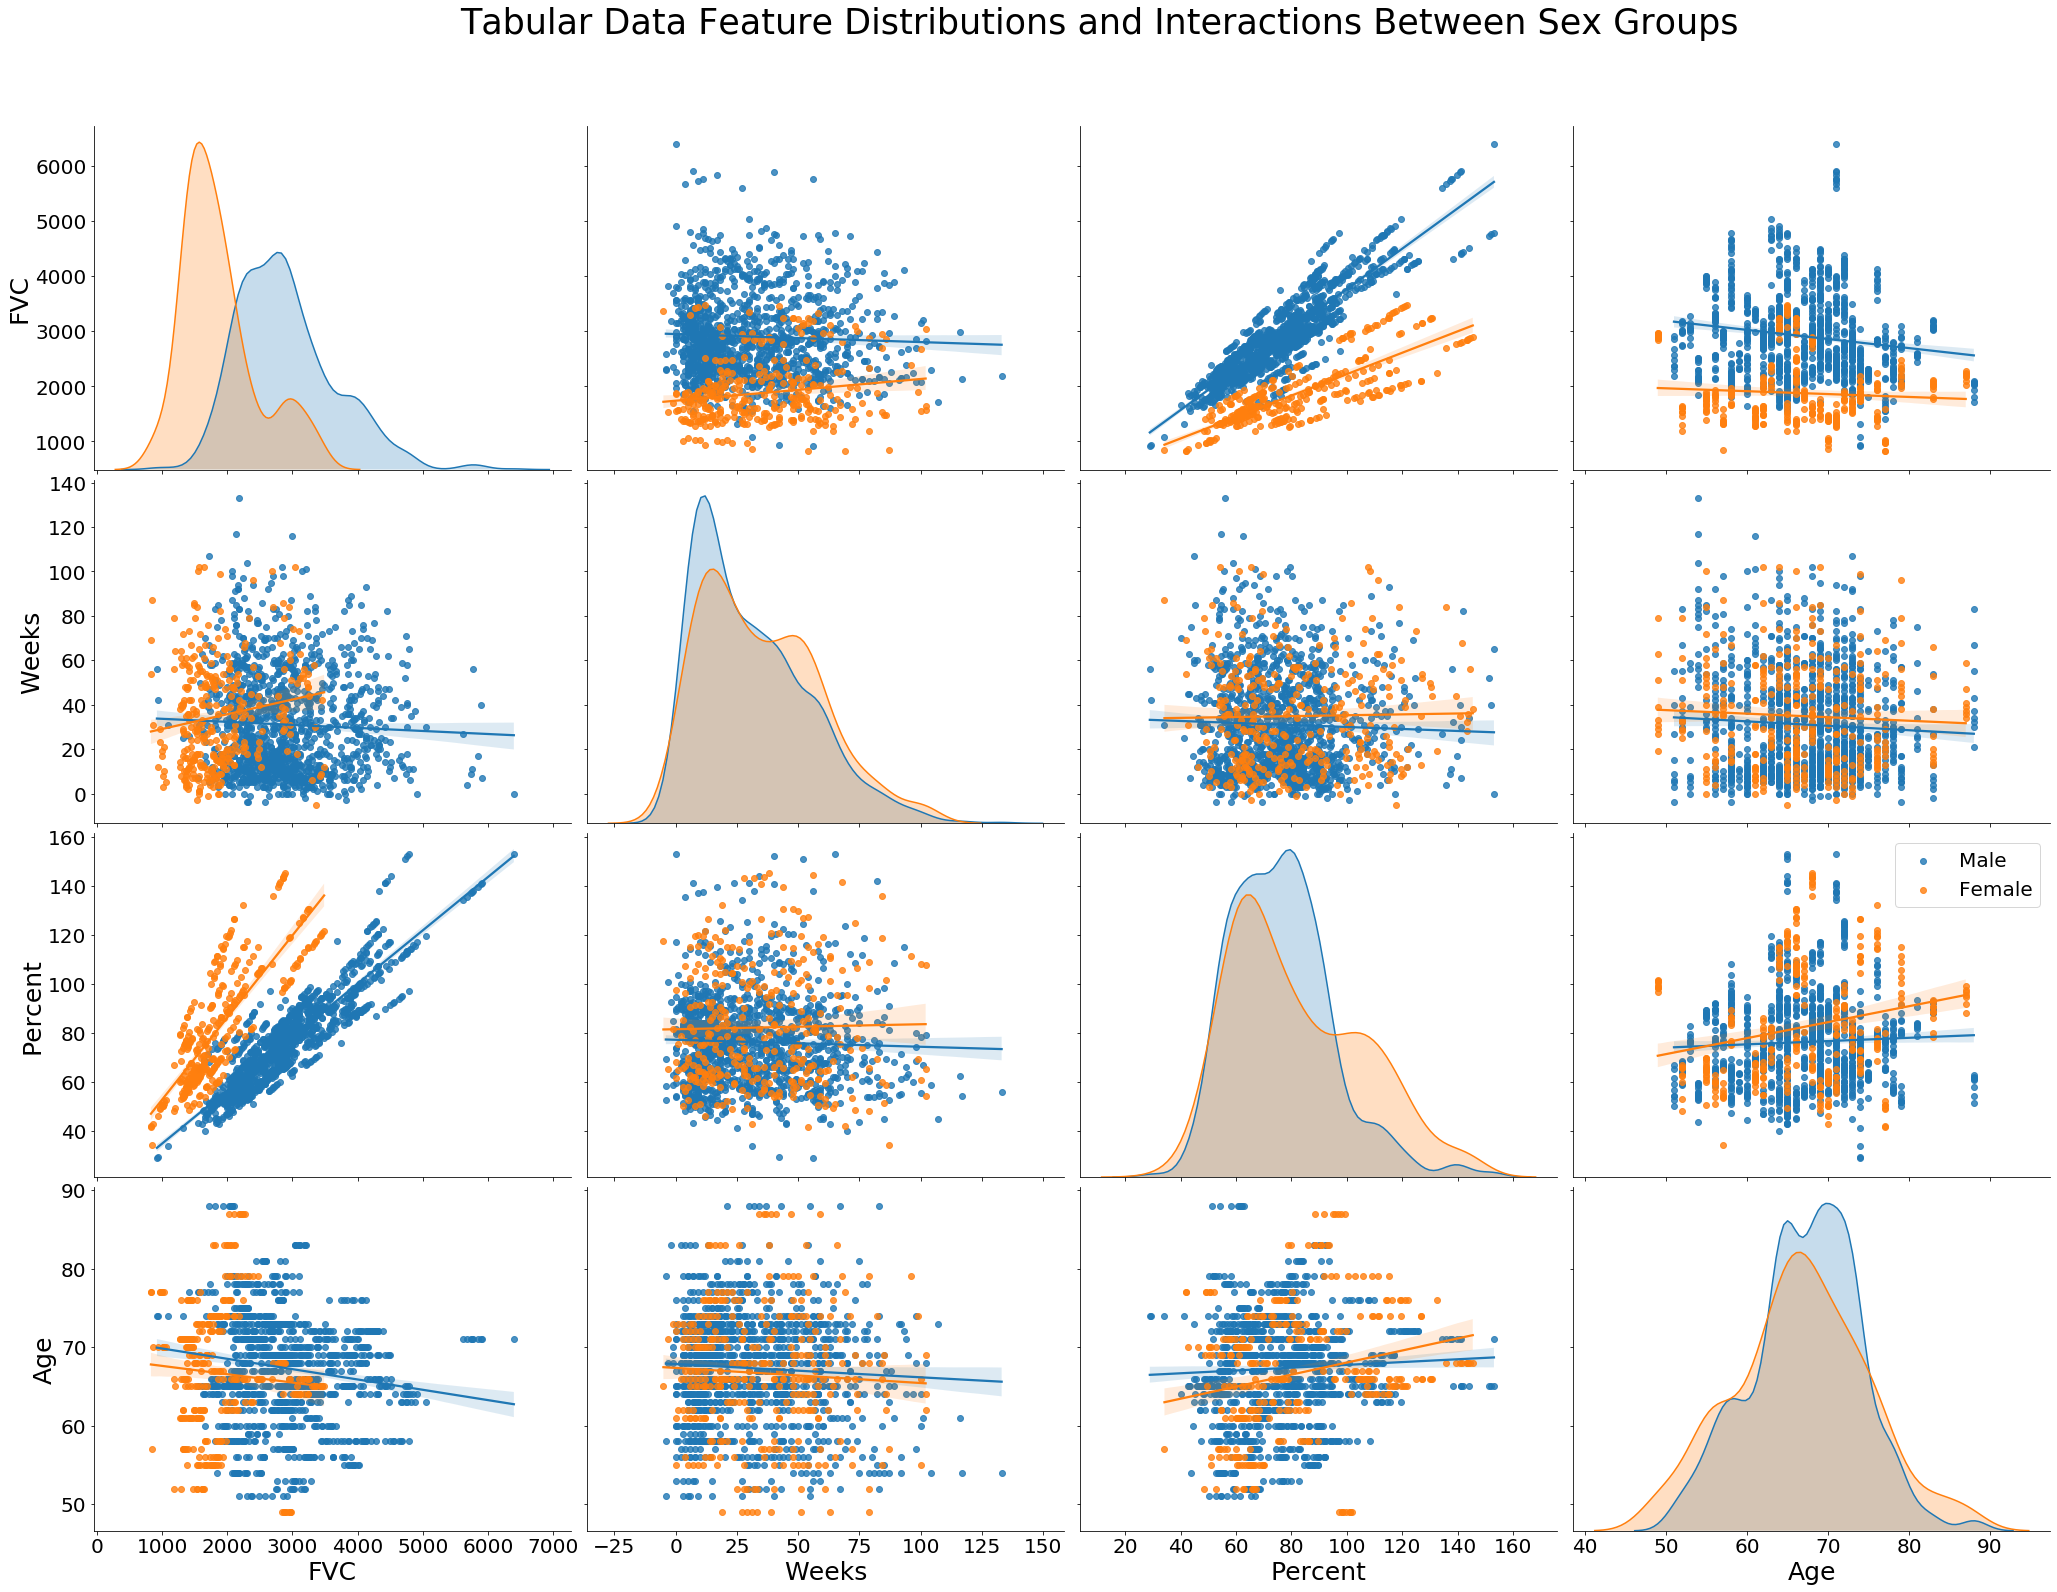

In [8]:
g = sns.pairplot(df_train[['FVC', 'Weeks', 'Percent', 'Age', 'Sex']], hue='Sex', aspect=1.4, height=5, diag_kind='kde', kind='reg')

g.axes[3, 0].set_xlabel('FVC', fontsize=25)
g.axes[3, 1].set_xlabel('Weeks', fontsize=25)
g.axes[3, 2].set_xlabel('Percent', fontsize=25)
g.axes[3, 3].set_xlabel('Age', fontsize=25)
g.axes[0, 0].set_ylabel('FVC', fontsize=25)
g.axes[1, 0].set_ylabel('Weeks', fontsize=25)
g.axes[2, 0].set_ylabel('Percent', fontsize=25)
g.axes[3, 0].set_ylabel('Age', fontsize=25)

g.axes[3, 0].tick_params(axis='x', labelsize=20)
g.axes[3, 1].tick_params(axis='x', labelsize=20)
g.axes[3, 2].tick_params(axis='x', labelsize=20)
g.axes[3, 3].tick_params(axis='x', labelsize=20)
g.axes[0, 0].tick_params(axis='y', labelsize=20)
g.axes[1, 0].tick_params(axis='y', labelsize=20)
g.axes[2, 0].tick_params(axis='y', labelsize=20)
g.axes[3, 0].tick_params(axis='y', labelsize=20)

plt.legend(prop={'size': 20})
g._legend.remove()
g.fig.suptitle('Tabular Data Feature Distributions and Interactions Between Sex Groups', fontsize=35, y=1.08)

plt.show()

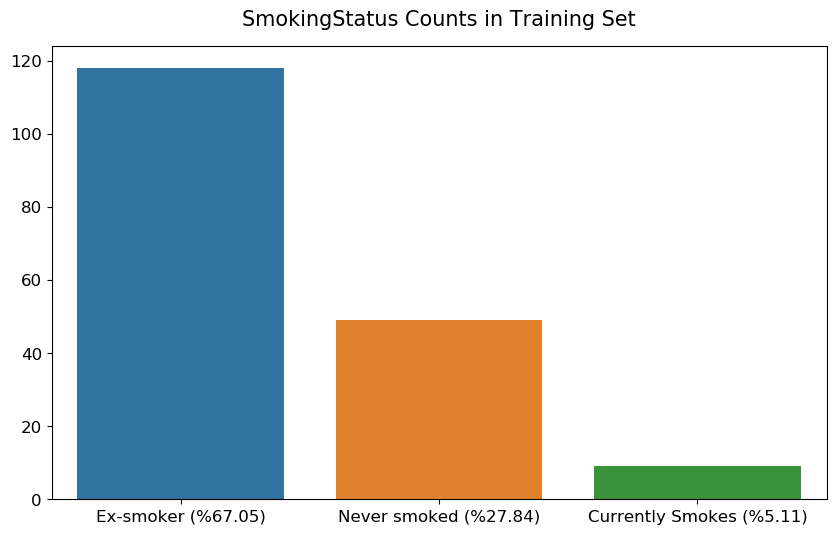

In [9]:
fig = plt.figure(figsize=(10, 6), dpi=100)

sns.barplot(x=df_train.groupby('Patient')['SmokingStatus'].first().value_counts().index, y=df_train.groupby('Patient')['SmokingStatus'].first().value_counts())
percentages = [(count / df_train.groupby('Patient')['SmokingStatus'].first().value_counts().sum() * 100).round(2) for count in df_train.groupby('Patient')['SmokingStatus'].first().value_counts()]

plt.ylabel('')
plt.xticks(np.arange(3), [f'Ex-smoker (%{percentages[0]})', f'Never smoked (%{percentages[1]})', f'Currently Smokes (%{percentages[2]})'])
plt.tick_params(axis='x', labelsize=12)
plt.tick_params(axis='y', labelsize=12)
plt.title('SmokingStatus Counts in Training Set', size=15, pad=15)

plt.show()

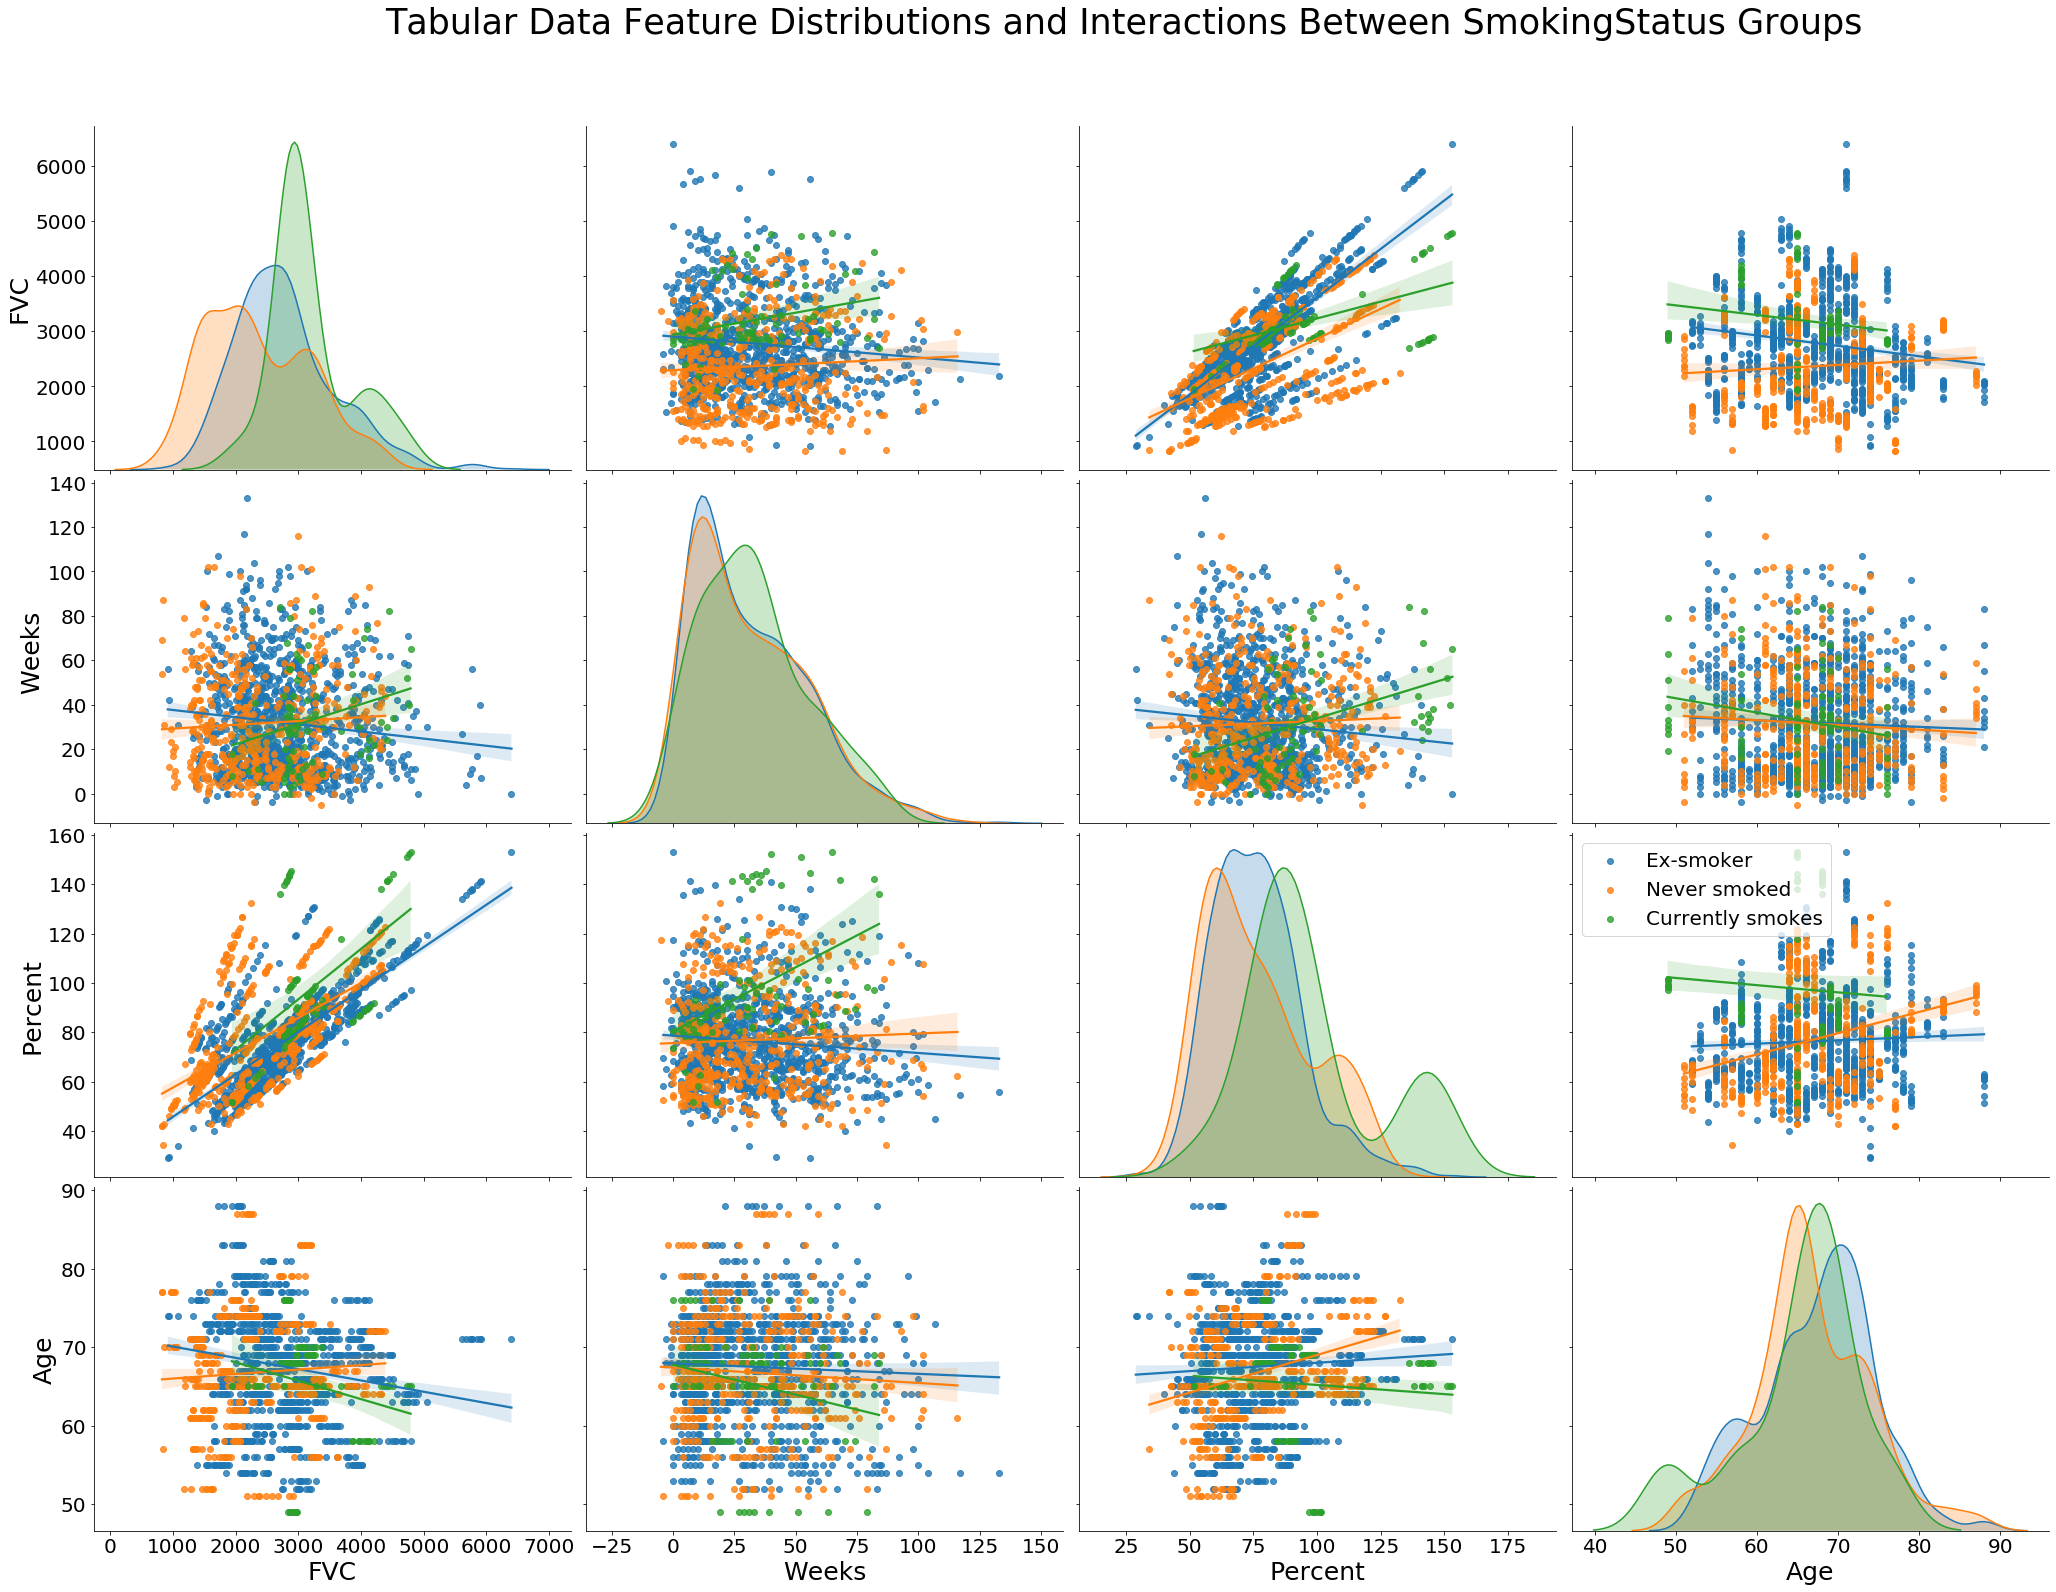

In [10]:
g = sns.pairplot(df_train[['FVC', 'Weeks', 'Percent', 'Age', 'SmokingStatus']], hue='SmokingStatus', aspect=1.4, height=5, diag_kind='kde', kind='reg')

g.axes[3, 0].set_xlabel('FVC', fontsize=25)
g.axes[3, 1].set_xlabel('Weeks', fontsize=25)
g.axes[3, 2].set_xlabel('Percent', fontsize=25)
g.axes[3, 3].set_xlabel('Age', fontsize=25)
g.axes[0, 0].set_ylabel('FVC', fontsize=25)
g.axes[1, 0].set_ylabel('Weeks', fontsize=25)
g.axes[2, 0].set_ylabel('Percent', fontsize=25)
g.axes[3, 0].set_ylabel('Age', fontsize=25)

g.axes[3, 0].tick_params(axis='x', labelsize=20)
g.axes[3, 1].tick_params(axis='x', labelsize=20)
g.axes[3, 2].tick_params(axis='x', labelsize=20)
g.axes[3, 3].tick_params(axis='x', labelsize=20)
g.axes[0, 0].tick_params(axis='y', labelsize=20)
g.axes[1, 0].tick_params(axis='y', labelsize=20)
g.axes[2, 0].tick_params(axis='y', labelsize=20)
g.axes[3, 0].tick_params(axis='y', labelsize=20)

plt.legend(prop={'size': 20})
g._legend.remove()
g.fig.suptitle('Tabular Data Feature Distributions and Interactions Between SmokingStatus Groups', fontsize=35, y=1.08)

plt.show()

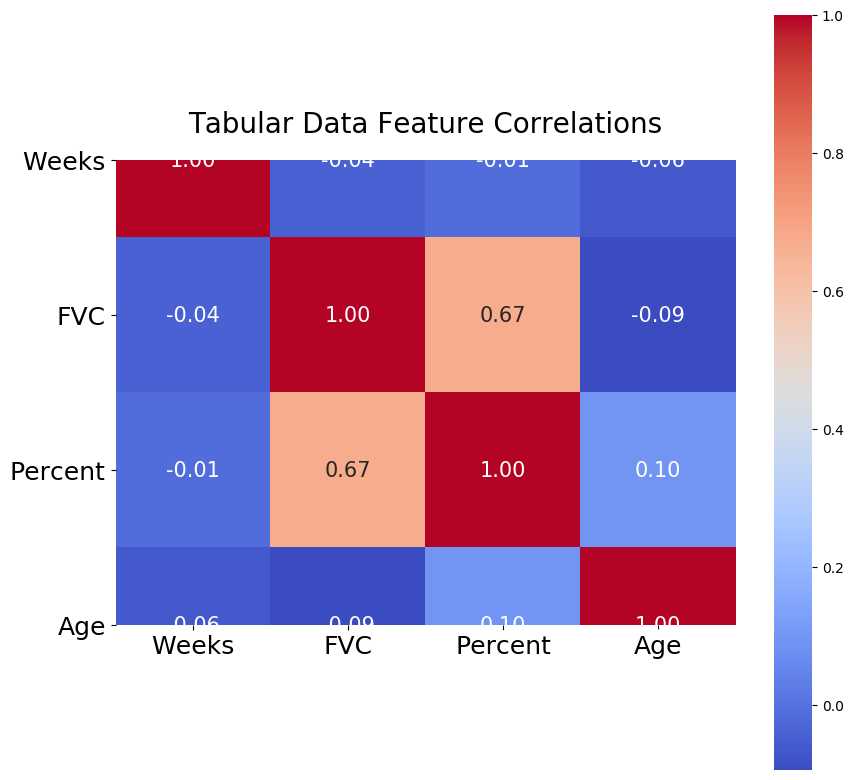

In [11]:
fig = plt.figure(figsize=(10, 10), dpi=100)

sns.heatmap(df_train.corr(), annot=True, square=True, cmap='coolwarm', annot_kws={'size': 15},  fmt='.2f')   

plt.tick_params(axis='x', labelsize=18, rotation=0)
plt.tick_params(axis='y', labelsize=18, rotation=0)
plt.title('Tabular Data Feature Correlations', size=20, pad=20)

plt.show()

In [12]:
import pydicom # for reading dicom files
import os # for doing directory operations 
import pandas as pd # for some simple data analysis (right now, just to load in the labels data and quickly reference it)
import matplotlib.pyplot as plt


In [13]:
data_dir = 'C:/Users/MG/Desktop/OSIC_pre/train/'
patients = os.listdir(data_dir)
labels_df = pd.read_csv('C:/Users/MG/Desktop/OSIC_pre/train.csv', index_col=0)
labels_df.head()

,Weeks,FVC,Percent,Age,Sex,SmokingStatus
Patient,,,,,,
ID00007637202177411956430,-4,2315,58.253649,79,Male,Ex-smoker
ID00007637202177411956430,5,2214,55.712129,79,Male,Ex-smoker
ID00007637202177411956430,7,2061,51.862104,79,Male,Ex-smoker
ID00007637202177411956430,9,2144,53.950679,79,Male,Ex-smoker
ID00007637202177411956430,11,2069,52.063412,79,Male,Ex-smoker


30 [-4  5  7  9 11 17 29 41 57]
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'AXIAL']
(0008, 0018) SOP Instance UID                    UI: 2.25.95516132172461492040664114239048418896
(0008, 0060) Modality                            CS: 'CT'
(0008, 0070) Manufacturer                        LO: 'GE MEDICAL SYSTEMS'
(0008, 1090) Manufacturer's Model Name           LO: 'LightSpeed VCT'
(0010, 0010) Patient's Name                      PN: 'ID00007637202177411956430'
(0010, 0020) Patient ID                          LO: 'ID00007637202177411956430'
(0010, 0040) Patient's Sex                       CS: ''
(0012, 0063) De-identification Method            LO: 'Table;'
(0018, 0015) Body Part Examined                  CS: 'Chest'
(0018, 0050) Slice Thickness                     DS: "1.25"
(0018, 0060) KVP                                 DS: "120.0"
(0018, 1110) Distance Source to Detector         DS: "9

(512, 512) 106


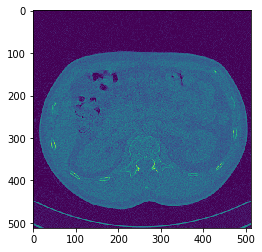

In [14]:
for patient in patients[:3]:
    label = labels_df.get_value(patient, 'Weeks')
    path = data_dir + patient
    
    slices = [pydicom.read_file(path + '/' + s) for s in os.listdir(path)]
    slices.sort(key = lambda x: int(x.ImagePositionPatient[2]))
       
    print(len(slices),label)
    print(slices[0])
    print(slices[0].pixel_array.shape, len(slices))
    plt.imshow(slices[0].pixel_array)

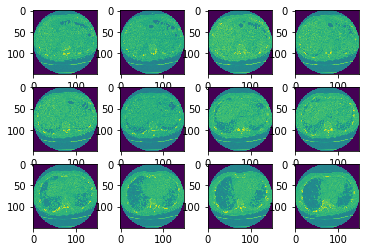

In [15]:
import cv2
import numpy as np

IMG_PX_SIZE = 150

for patient in patients[:1]:
    label = labels_df.get_value(patient, 'Weeks')
    path = data_dir + patient
    slices = [pydicom.read_file(path + '/' + s) for s in os.listdir(path)]
    slices.sort(key = lambda x: int(x.ImagePositionPatient[2]))
    fig = plt.figure()
    for num,each_slice in enumerate(slices[:12]):
        y = fig.add_subplot(3,4,num+1)
        new_img = cv2.resize(np.array(each_slice.pixel_array),(IMG_PX_SIZE,IMG_PX_SIZE))
        y.imshow(new_img)
    plt.show()